In [1]:
#https://www.kaggle.com/code/rehabahmedkhalifa/credit-classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [2]:
df=pd.read_csv("credit_train.csv" ,sep="," ,encoding="utf-8")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [3]:
df = df.dropna(subset=['Credit Score', 'Annual Income'])
df['Months since last delinquent']=df['Months since last delinquent'].fillna(0)
df['Bankruptcies']=df['Bankruptcies'].fillna(0)
df = df.drop_duplicates(subset=['Loan ID'])


#Convert 'Credit Score' to string and remove last digit if it has four digits
# for i in range(len(df['Credit Score'])):
#     # Check if the length of the value is 4 digits
#     print(len(str(df['Credit Score'][i])))
#     if len(str(df['Credit Score'][i])) == 4:
#         #print(str(df['Credit Score'][i]))
#         # Remove the last digit
#         df['Credit Score'][i] = int(str(df['Credit Score'][i])[:-1])

#df['modified_credit_scores'] = [int(str(score)[:3] + str(score)[4:]) if str(score)[3] == '0' else score for score in df['Credit Score']]

df['Credit Score'] = df['Credit Score'].astype(str).apply(lambda x: x[:-1] if len(x) == 4 else x)
#df['Credit Score'] = df['Credit Score'].astype(int)
# Convert 'Credit Score' back to numeric type
#df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
df.drop(df[["Tax Liens"]] ,axis =1 ,inplace =True)
df["Debt to Income Ratio"] = df["Monthly Debt"]/(df["Annual Income"]/12)
df.info()
df.to_csv('cleaned.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 67052 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       67052 non-null  object 
 1   Customer ID                   67052 non-null  object 
 2   Loan Status                   67052 non-null  object 
 3   Current Loan Amount           67052 non-null  float64
 4   Term                          67052 non-null  object 
 5   Credit Score                  67052 non-null  object 
 6   Annual Income                 67052 non-null  float64
 7   Years in current job          64196 non-null  object 
 8   Home Ownership                67052 non-null  object 
 9   Purpose                       67052 non-null  object 
 10  Monthly Debt                  67052 non-null  float64
 11  Years of Credit History       67052 non-null  float64
 12  Months since last delinquent  67052 non-null  float64
 13  Number

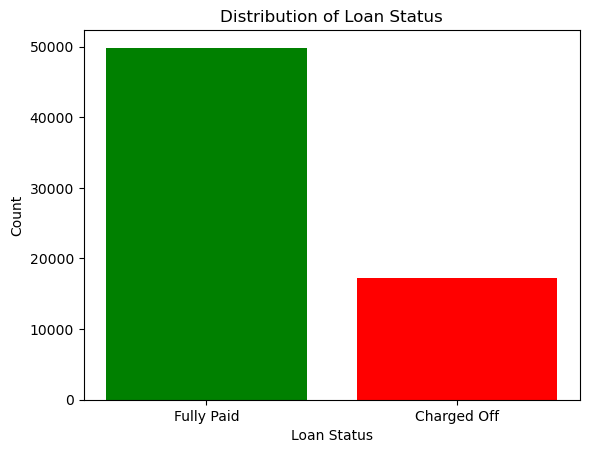

In [ ]:
status_counts = df['Loan Status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

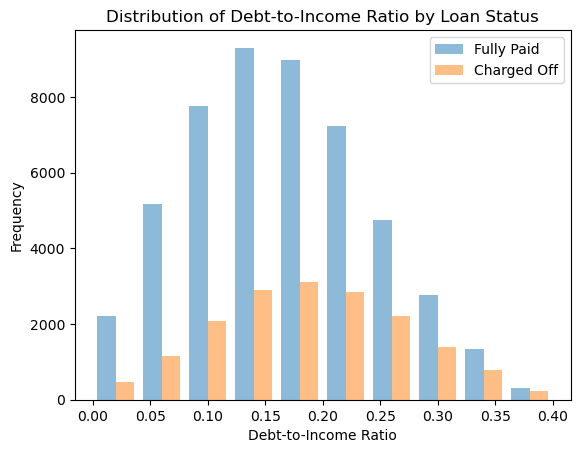

In [ ]:
#Debt to Income Ratio by Loan Status

grouped_data = df.groupby('Loan Status')['Debt to Income Ratio']

# Create a histogram for each group
plt.hist([grouped_data.get_group(status) for status in df['Loan Status'].unique()],
         bins=10, alpha=0.5, label=df['Loan Status'].unique())

# Adding labels and title
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio by Loan Status')

# Adding legend
plt.legend()

# Show the plot
plt.show()

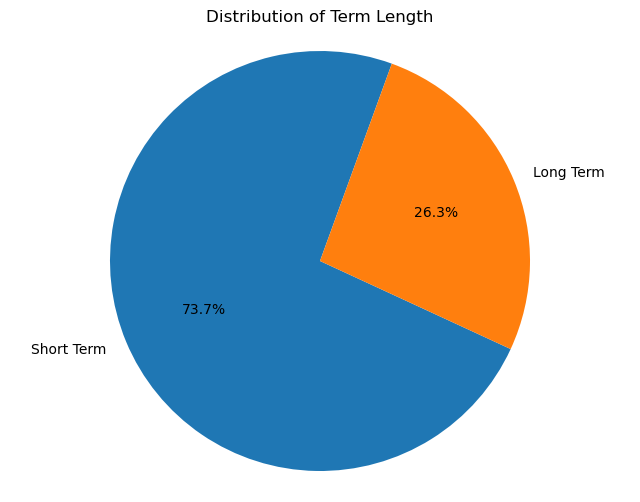

In [ ]:
term_counts = df['Term'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=70)

# Adding title
plt.title('Distribution of Term Length')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df_short_term = df.loc[df["Term"] == "Short Term"]
df_short_term['Term'].value_counts()

Term
Short Term    49396
Name: count, dtype: int64

In [ ]:
df_short_term['Purpose'].value_counts()

Purpose
Debt Consolidation      38496
other                    3117
Home Improvements        2769
Other                    1761
Business Loan             736
Buy a Car                 692
Medical Bills             596
Take a Trip               330
Buy House                 316
major_purchase            181
small_business            134
moving                     81
Educational Expenses       64
wedding                    62
vacation                   56
renewable_energy            5
Name: count, dtype: int64

In [ ]:
# Count the occurrences of each loan purpose


df_short_term['Purpose'].replace({'small_business': 'Business Loan'}, inplace=True)
df_short_term['Purpose'].replace(['other','major_purchase','Educational Expenses',"moving",'renewable_energy','wedding'],'Other', inplace=True)
df_short_term['Purpose'].replace(['Take a Trip','vacation'],'Vacation', inplace=True)

df_short_term['Purpose'].value_counts()


C:\Users\jimmy\AppData\Local\Temp\ipykernel_21740\3743579887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_term['Purpose'].replace({'small_business': 'Business Loan'}, inplace=True)
C:\Users\jimmy\AppData\Local\Temp\ipykernel_21740\3743579887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_term['Purpose'].replace(['other','major_purchase','Educational Expenses',"moving",'renewable_energy','wedding'],'Other', inplace=True)
C:\Users\jimmy\AppData\Local\Temp\ipykernel_21740\3743579887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

Purpose
Debt Consolidation    38496
Other                  5271
Home Improvements      2769
Business Loan           870
Buy a Car               692
Medical Bills           596
Vacation                386
Buy House               316
Name: count, dtype: int64

In [ ]:
# Count the occurrences of each loan purpose


df['Purpose'].replace({'small_business': 'Business Loan'}, inplace=True)
df['Purpose'].replace(['other','major_purchase','Educational Expenses',"moving",'renewable_energy','wedding'],'Other', inplace=True)
df['Purpose'].replace(['Take a Trip','vacation'],'Vacation', inplace=True)

df['Purpose'].value_counts()

Purpose
Debt Consolidation    52877
Other                  6560
Home Improvements      3931
Business Loan          1211
Buy a Car               882
Medical Bills           726
Buy House               441
Vacation                424
Name: count, dtype: int64

In [4]:
# status_counts = df['Purpose'].value_counts()
# plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
# plt.xlabel('Loan Status')
# plt.ylabel('Count')
# plt.title('Distribution of Loan Status')
# plt.show()

# df_short_term = df.loc[df["Term"] == "Short Term"]
# df_long_term = df.loc[df["Term"] == "Long Term"]
df_clean=pd.read_csv("cleaned.csv" ,sep="," ,encoding="utf-8")
df_group = df_clean.groupby(['Term','Purpose'])
df_group.plot(kind="bar",figsize=(10,6))
# plt.bar(df_group)
plt.xlabel("Term Length") 
plt.ylabel("Number of Loans") 
plt.title("Breakdown of Loan Reason by Term Length") 
plt.show()




# Y_axis = df_short_term['Purpose']
# Z_axis = df_long_term['Purpose']

# X = ["Short Term","Long Term"]
# X_axis = np.arange(len(X)) 


# plt.bar(X_axis - 0.2, Y_axis, 0.4, label = 'Short Term') 
# plt.bar(X_axis + 0.2, Z_axis, 0.4, label = 'Long Term') 
  
# plt.xticks(X_axis,X) 
# plt.xlabel("Term Length") 
# plt.ylabel("Number of Loans") 
# plt.title("Breakdown of Loan Reason by Term Length") 
# plt.legend() 
# plt.show() 

KeyboardInterrupt: 

In [47]:
df['Credit Score'] = df['Credit Score'].astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 67052 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       67052 non-null  object 
 1   Customer ID                   67052 non-null  object 
 2   Loan Status                   67052 non-null  object 
 3   Current Loan Amount           67052 non-null  float64
 4   Term                          67052 non-null  object 
 5   Credit Score                  67052 non-null  float64
 6   Annual Income                 67052 non-null  float64
 7   Years in current job          64196 non-null  object 
 8   Home Ownership                67052 non-null  object 
 9   Purpose                       67052 non-null  object 
 10  Monthly Debt                  67052 non-null  float64
 11  Years of Credit History       67052 non-null  float64
 12  Months since last delinquent  67052 non-null  float64
 13  Number

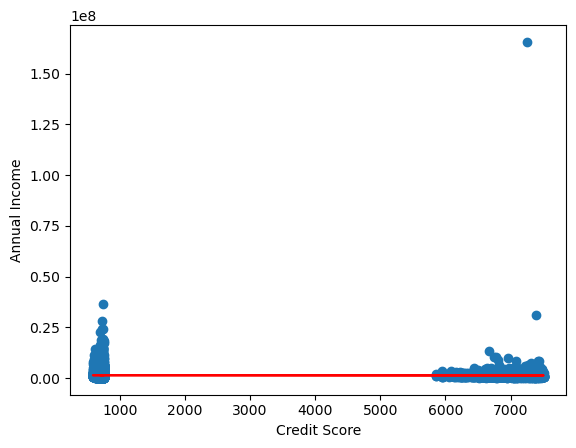

<class 'pandas.core.frame.DataFrame'>
Index: 67052 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       67052 non-null  object 
 1   Customer ID                   67052 non-null  object 
 2   Loan Status                   67052 non-null  object 
 3   Current Loan Amount           67052 non-null  float64
 4   Term                          67052 non-null  object 
 5   Credit Score                  67052 non-null  float64
 6   Annual Income                 67052 non-null  float64
 7   Years in current job          64196 non-null  object 
 8   Home Ownership                67052 non-null  object 
 9   Purpose                       67052 non-null  object 
 10  Monthly Debt                  67052 non-null  float64
 11  Years of Credit History       67052 non-null  float64
 12  Months since last delinquent  67052 non-null  float64
 13  Number

In [49]:
# Create a linear regression between loan status and credit score

x_values = df["Credit Score"]
y_values = df["Annual Income"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.show()
df.info()